<a href="https://colab.research.google.com/github/PrinceZarzees/Machine_Learning_Sessional/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
!pip install keras-video-generators

In [ ]:
# model 2

In [ ]:
import os
import glob
import keras
from keras_video import VideoFrameGenerator
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('data/*')]
classes.sort()
# some global params
SIZE = (180, 180)
CHANNELS = 3
NBFRAME = 10
BS = 32
# pattern to get videos and classes
glob_pattern='data/{classname}/*'
# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes,
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.2,
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)
valid = train.get_validation_generator()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Flatten, Dense, GRU, Input
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


# Freeze layers in VGG16 model
for layer in vgg16.layers[:]:
    layer.trainable = False


input_layer = Input(shape=(None, 180, 180, 3))
time_distributed_layer = TimeDistributed(vgg16)(input_layer)
flatten_layer = TimeDistributed(Flatten())(time_distributed_layer)
gru_layer = GRU(128)(flatten_layer)
dense_layers = Dense(128, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(dense_layers)
dense_layers = Dense(64, activation='relu')(dense_layers)
predictions = Dense(12, activation='softmax')(dense_layers)

# Create model
model = Model(inputs=input_layer, outputs=predictions)
# Compile the model
optimizer = keras.optimizers.Adam(0.001)
model.compile(
    optimizer,
    'categorical_crossentropy',
    metrics=['acc']
)

model.summary()

EPOCHS=50




callbacks = [
    keras.callbacks.ReduceLROnPlateau(verbose=1),
    keras.callbacks.ModelCheckpoint(
        'chkp/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
]

# Now you can continue training the model with loaded weights
model.fit_generator(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
    callbacks=callbacks
)

In [ ]:
import os
import glob
import keras
from keras_video import VideoFrameGenerator
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('data/*')]
classes.sort()
# some global params
SIZE = (180, 180)
CHANNELS = 3
NBFRAME = 10
BS = 32
# pattern to get videos and classes
glob_pattern='data/{classname}/*'
# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes,
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.2,
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)
valid = train.get_validation_generator()
test_data=valid.files

class Bowled, validation count: 30, train count: 120
class Reverse Sweep, validation count: 24, train count: 98
class cover, validation count: 37, train count: 151
class defense, validation count: 38, train count: 154
class flick, validation count: 36, train count: 145
class hook, validation count: 36, train count: 145
class late_cut, validation count: 36, train count: 146
class lofted, validation count: 39, train count: 159
class pull, validation count: 35, train count: 144
class square_cut, validation count: 40, train count: 160
class straight, validation count: 38, train count: 155
class sweep, validation count: 38, train count: 156
Total data: 12 classes for 1733 files for train
Total data: 12 classes for 427 files for validation


In [ ]:
print (test_data)

['data/Bowled/(11).mp4', 'data/Bowled/(87).mp4', 'data/Bowled/(86).mp4', 'data/Bowled/(41).mp4', 'data/Bowled/(122).mp4', 'data/Bowled/(66).mp4', 'data/Bowled/(92).mp4', 'data/Bowled/(42).mp4', 'data/Bowled/(83).mp4', 'data/Bowled/(8).mp4', 'data/Bowled/(144).mp4', 'data/Bowled/(81).mp4', 'data/Bowled/(13).mp4', 'data/Bowled/(57).mp4', 'data/Bowled/(135).mp4', 'data/Bowled/(19).mp4', 'data/Bowled/(120).mp4', 'data/Bowled/(79).mp4', 'data/Bowled/(55).mp4', 'data/Bowled/(85).mp4', 'data/Bowled/(98).mp4', 'data/Bowled/(118).mp4', 'data/Bowled/(38).mp4', 'data/Bowled/(88).mp4', 'data/Bowled/(131).mp4', 'data/Bowled/(129).mp4', 'data/Bowled/(82).mp4', 'data/Bowled/(75).mp4', 'data/Bowled/(74).mp4', 'data/Bowled/(35).mp4', 'data/Reverse Sweep/(119).mp4', 'data/Reverse Sweep/(91).mp4', 'data/Reverse Sweep/(38).mp4', 'data/Reverse Sweep/(97).mp4', 'data/Reverse Sweep/(1).mp4', 'data/Reverse Sweep/(26).mp4', 'data/Reverse Sweep/(114).mp4', 'data/Reverse Sweep/(96).mp4', 'data/Reverse Sweep/(74)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Flatten, Dense, GRU, Input
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


# Freeze layers in VGG16 model
for layer in vgg16.layers[:]:
    layer.trainable = False


input_layer = Input(shape=(None, 180, 180, 3))
time_distributed_layer = TimeDistributed(vgg16)(input_layer)
flatten_layer = TimeDistributed(Flatten())(time_distributed_layer)
gru_layer = GRU(128)(flatten_layer)
dense_layers = Dense(128, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(dense_layers)
dense_layers = Dense(64, activation='relu')(dense_layers)
predictions = Dense(12, activation='softmax')(dense_layers)

# Create model
model2 = Model(inputs=input_layer, outputs=predictions)


model2.summary()

# # Load the weights
model2.load_weights('chkp/model2_weights.hdf5')

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 180, 180,   0         
                              3)]                                
                                                                 
 time_distributed (TimeDist  (None, None, 5, 5, 512)   14714688  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 12800)       0         
 stributed)                                                      
                                                                 
 gru (GRU)                   (None, 128)               4965120   
                                                                 
 dense_1 (Dense)             (None, 128)               16512  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through each video in the test dataset
for video_path in test_data:
    # Extract the ground truth label from the video path
    true_label = video_path.split('/')[-2]
    true_labels.append(true_label)

    # Preprocess the input video
    frames = VideoFrameGenerator(
        nb_frames=NBFRAME,
        target_shape=(SIZE),
        nb_channel=CHANNELS,
        transformation=data_aug,
        use_frame_cache=True)._get_frames(video_path, NBFRAME, SIZE)
    X = np.expand_dims(frames, axis=0)

    # Predict class probabilities
    predictions = model2.predict(X)

    # Get the predicted label with highest probability
    predicted_label = classes[np.argmax(predictions)]
    # print (predicted_label)
    predicted_labels.append(predicted_label)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Calculate precision, recall, and F1 score
classification_rep = classification_report(true_labels, predicted_labels, target_names=classes)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


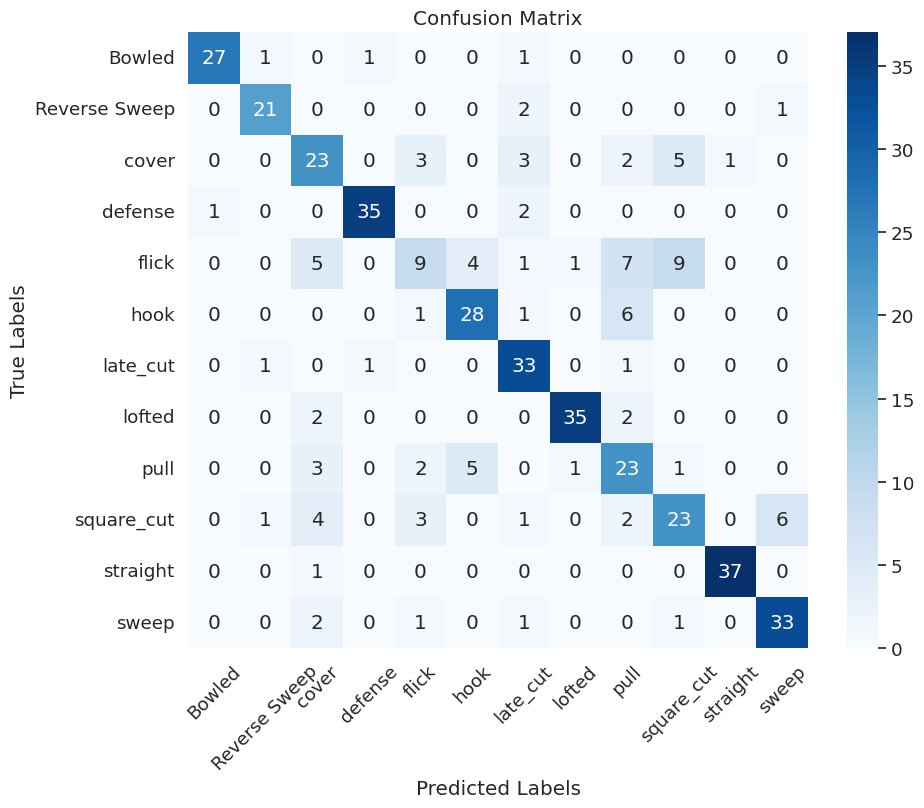


Classification Report:
               precision    recall  f1-score   support

       Bowled       0.96      0.90      0.93        30
Reverse Sweep       0.88      0.88      0.88        24
        cover       0.57      0.62      0.60        37
      defense       0.95      0.92      0.93        38
        flick       0.47      0.25      0.33        36
         hook       0.76      0.78      0.77        36
     late_cut       0.73      0.92      0.81        36
       lofted       0.95      0.90      0.92        39
         pull       0.53      0.66      0.59        35
   square_cut       0.59      0.57      0.58        40
     straight       0.97      0.97      0.97        38
        sweep       0.82      0.87      0.85        38

     accuracy                           0.77       427
    macro avg       0.77      0.77      0.76       427
 weighted avg       0.76      0.77      0.76       427



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculate precision, recall, and F1 score
classification_rep = classification_report(true_labels, predicted_labels, target_names=classes)

# Convert classification report to DataFrame
# Convert classification report to DataFrame

print("\nClassification Report:")
print(classification_rep)

In [ ]:
import os
import keras
from keras_video import VideoFrameGenerator
import cv2
import numpy as np
import os
import glob
classes = [i.split(os.path.sep)[1] for i in glob.glob('data/*')]
classes.sort()
# Initialize VideoFrameGenerator
SIZE = (180, 180)
CHANNELS = 3
NBFRAME = 10

data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)

# Preprocess input video
input_video_path = 'live_tests/ban_sa_pull.mp4'  # Replace with the path to your input video
frames = VideoFrameGenerator(
    nb_frames=NBFRAME,
    target_shape=(SIZE),
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)._get_frames(input_video_path,NBFRAME,SIZE)

# Reshape frames to fit model's input shape
X = np.expand_dims(frames, axis=0)
# print (X.shape)


# Predict class probabilities
predictions = model2.predict(X)

for i, class_prob in enumerate(predictions[0]):
    print(f"Class: {classes[i]}, Probability: {class_prob}")

Please check if the path is OK, and if the glob pattern is correct.
See https://docs.python.org/3/library/glob.html


Total data: 0 classes for 0 files for train
1/1 [==============================] - 3s 3s/step
Class: Bowled, Probability: 3.0097535841377976e-07
Class: Reverse Sweep, Probability: 9.992670129577164e-06
Class: cover, Probability: 0.00013546933769248426
Class: defense, Probability: 7.088330988835878e-08
Class: flick, Probability: 0.020457588136196136
Class: hook, Probability: 0.04233071953058243
Class: late_cut, Probability: 1.4686131180496886e-05
Class: lofted, Probability: 0.8845728635787964
Class: pull, Probability: 0.05082617327570915
Class: square_cut, Probability: 0.0010136509081348777
Class: straight, Probability: 1.7199175772475428e-07
Class: sweep, Probability: 0.0006382479914464056


In [ ]:
# model 1

In [ ]:
import os
import glob
import keras
from keras_video import VideoFrameGenerator
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('data/*')]
classes.sort()
# some global params
SIZE = (180, 180)
CHANNELS = 3
NBFRAME = 10
BS = 32
# pattern to get videos and classes
glob_pattern='data/{classname}/*.avi'
# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes,
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.2,
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)
valid = train.get_validation_generator()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Flatten, Dense, GRU, Input
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


# Freeze layers in VGG16 model
for layer in vgg16.layers[:]:
    layer.trainable = False


input_layer = Input(shape=(None, 180, 180, 3))
time_distributed_layer = TimeDistributed(vgg16)(input_layer)
flatten_layer = TimeDistributed(Flatten())(time_distributed_layer)
gru_layer = GRU(128)(flatten_layer)
dense_layers = Dense(512, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(dense_layers)
dense_layers = Dense(64, activation='relu')(dense_layers)
predictions = Dense(10, activation='softmax')(dense_layers)

# Create model
model = Model(inputs=input_layer, outputs=predictions)
# Compile the model
optimizer = keras.optimizers.Adam(0.001)
model.compile(
    optimizer,
    'categorical_crossentropy',
    metrics=['acc']
)

model.summary()

EPOCHS=50




callbacks = [
    keras.callbacks.ReduceLROnPlateau(verbose=1),
    keras.callbacks.ModelCheckpoint(
        'chkp/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
]

# Now you can continue training the model with loaded weights
model.fit_generator(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
    callbacks=callbacks
)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Flatten, Dense, GRU, Input
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


# Freeze layers in VGG16 model
for layer in vgg16.layers[:]:
    layer.trainable = False


input_layer = Input(shape=(None, 180, 180, 3))
time_distributed_layer = TimeDistributed(vgg16)(input_layer)
flatten_layer = TimeDistributed(Flatten())(time_distributed_layer)
gru_layer = GRU(128)(flatten_layer)
dense_layers = Dense(512, activation='relu')(gru_layer)
dense_layers = Dense(128, activation='relu')(dense_layers)
dense_layers = Dense(64, activation='relu')(dense_layers)
predictions = Dense(10, activation='softmax')(dense_layers)

# Create model
model1 = Model(inputs=input_layer, outputs=predictions)

# # Load the weights
model1.load_weights('chkp/model1_weights.hdf5')

In [ ]:
import os
import keras
from keras_video import VideoFrameGenerator
import cv2
import numpy as np
import os
import glob
classes = [i.split(os.path.sep)[1] for i in glob.glob('data/*')]
classes.sort()
classes.remove('Reverse Sweep')
classes.remove('Bowled')
# Initialize VideoFrameGenerator
SIZE = (180, 180)
CHANNELS = 3
NBFRAME = 10

data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)

# Preprocess input video
input_video_path = 'live_tests/aus_nz_straight.mp4'  # Replace with the path to your input video
frames = VideoFrameGenerator(
    nb_frames=NBFRAME,
    target_shape=(SIZE),
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)._get_frames(input_video_path,NBFRAME,SIZE)

# Reshape frames to fit model's input shape
X = np.expand_dims(frames, axis=0)
# print (X.shape)


# Predict class probabilities
predictions = model1.predict(X)

for i, class_prob in enumerate(predictions[0]):
    print(f"Class: {classes[i]}, Probability: {class_prob}")

Please check if the path is OK, and if the glob pattern is correct.
See https://docs.python.org/3/library/glob.html


Total data: 0 classes for 0 files for train
1/1 [==============================] - 5s 5s/step
Class: cover, Probability: 0.0005801336956210434
Class: defense, Probability: 0.0005378376808948815
Class: flick, Probability: 0.0004884786321781576
Class: hook, Probability: 2.989356653415598e-05
Class: late_cut, Probability: 2.6255836928612553e-05
Class: lofted, Probability: 1.5968402294674888e-05
Class: pull, Probability: 5.917732778470963e-06
Class: square_cut, Probability: 1.7831367813414545e-06
Class: straight, Probability: 0.9983137845993042
Class: sweep, Probability: 5.653825141394009e-08
